# A Feed-forward Neural Network Tutorial for Beginner

## Introduction
Neural network is one of the most popular topics in today's data science. I'm pretty sure that all of the students in the class have at least heard about it. However, for those who haven't worked on neural network, it may sounds like something very complicated and hard to understand. To be honest, I am one of the people who feel "afraid" when hearing the word "Neural network" at the first time.

Thus, the aim of this proposal is very simple: try to let anyone, even not in the area related to computer science, understand the basic theory of Neural Network and how it works. Here we choose to only talk about feed-forward neural network because it is popular and easy to understad.

If you‘ve already known something about neural network, you will find this tutorial too easy for you, but I'll be very happy if this could give you some new thoughts on neural network. 

## Tutorial Content
In this tutorial, we will cover the following topic:

- [Classifier](#Classifier)
- [Neuron](#Neuron)
- [Perceptron](#Perceptron)
- [Nonlinear Activation Function](#Nonlinear-Activation-Function)
- [Training](#Training)

## Classifier
**Neural network is widely used as a classifier.** But first of all, what is a classifier?

To explain that, we need to take a look at different examples of classification in our life.

- When you see an animal, you will using your commmon sense to judge it as "cat", "dog", "fish" or "bird".
- When you go for a physical examination, the doctor will do a blood test for you, and judge as "HIV seronegative" or “HIV seropositive” based on the test result.
- When your email box recieve an email, it will put it into "Inbox" or "Spam" by detecting the title or content of that email.

These example share something in common, they all have:
- **An Input**, some facts or features we have: The appearence of the animal, the result of the blood test, the content of the email, etc.
- **A process of differentiate and understood the input features**: The appearence of wings implied bird, a normal test result implied HIV negative, a "Free money" title implied a spam.
- **An output**: the result you get

**A machine that can do a classification automatically is called a classifier**. A classifier also share the three things we talked about above, the only difference is the representation:
- The input of a classifier is a vector, also called feature vector. For eaxmple, the input for spam will be a vector like [0,1,0,1,0,0 ...], where the '1's shows the existance of a specific word.
- Classification process: done by the classifier automatically
- The output: A class. For example, '1' means spam, '0' means inbox email.



## Neuron
**A neuron is a basic neural network cell.** Computer Scientist get the inspiration from the structure and fuction of biological neuron.

**A neuron is a classifier.** For example, if we set the input of a neuron as a feature vector [x,y], and the output as 0 or 1 (0 for red point and 1 for blue point). Take a look at the following picture:

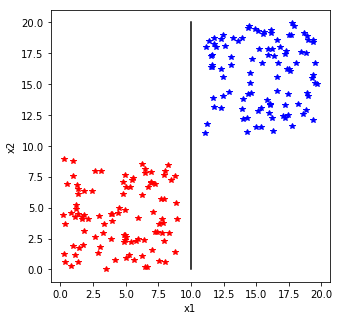

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
import math

#Generate two random datasets
def randomPoint(num, x,y, mark, col):
    for i in range(0, num):
        a = random.uniform(x, y)
        b = random.uniform(x, y)
        plt.plot(a,b,marker = mark,color = col)
#lot the datasets
plt.figure(figsize=(5,5))
plt.xlabel('x1')
plt.ylabel('x2')
randomPoint(100, 0,9, '*', "red")
randomPoint(100, 11,20, '*', "blue")
plt.plot([10,10],[0,20],"black")
plt.show()

We could classify these two features by eyes: just draw a line x1 = 10 could perfectly separate the red and blue points. **The line x1 = 10 is a linear decision surface, which cut the feature space (namely this picture) into half.** When we get a new feature vector [x1,x2], we could predict it as a red point if x1 < 10, and a blue point in the other case.

The picture is a 2 dimension feature space, and we could use a line to divide it into two half. For a 3 dimension feature space, we could use a surface to do this. For an n dimension feature space, we could use a n-1 dimension space to divide it. For the 2 dimension surface, the linear decision surface could be expressed as:
$$w_{0} + w_{1}x_{1} + w_{2}x_{2}   = 0$$ 
We could easily deducted that in an n dimension space, when the input vector is $X = [x_{1},x_{2},x_{3},...,x_{n}]$, the decision surface could be expressed as: 
$$w_{0} + w_{1}x_{1} + w_{2}x_{2} + ... + w_{n}x_{n} = 0$$

where $w_{1},...,w_{n}$ is the weight of each feature, and $w_{0}$ is the bias of the whole input. Using bias could avoid the situation that output is 0.

Thus, a neuron could be showed by the figure below:

![Neuron](https://raw.githubusercontent.com/wangchy27/picture/master/IMG_4C6E6B27A4F7-1.jpeg)

However, to get the result of the classification, we need to add an **activation fuction** to the model, to map the result into 2 classes, that is:
$$f(X) = \begin{cases} 0 (red), & \mbox{if }(w_{0} + \sum_{1}^{n}{w_{i}x_{i}})\mbox{ < 0} \\ 1 (blue), & \mbox{if }(w_{0} + \sum_{1}^{n}{w_{i}x_{i}})\mbox{ > 0} \end{cases} $$

Also could be written as:
$$f(x) = sgn(w_{0} + \sum_{1}^{n}{w_{i}x_{i}})$$

Which could be shown as:
![Neuron2](https://raw.githubusercontent.com/wangchy27/picture/master/IMG_A7D1E1787CB6-1.jpeg)

**This is also called M-P Neuron Model, proposed by *Warren McCulloch* and *Walter Pitts* in 1943.** Both of them are neuroscientists.



**Now, we could give a thourough definition of neuron as a classifier:**
- **Input**: An n dimension feature vector $X = [x_{1},x_{2},x_{3},...,x_{n}]$.
- **Classify**: $Sum = w_{0} + \sum_{1}^{n}{w_{i}x_{i}}$
- **Output**: If $Sum > 0$, output is 1. Else output is 0.


## Perceptron
After talking about neurons, you may already notice that the function of a single neuron is limited. **One of the disadvantage of a single neuron is that it could only give one linear decision surface.** For example, if we are given the following dataset:

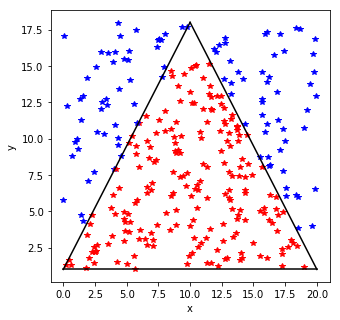

In [2]:
#Calculate the area of the triangle
def TriangleArea(A, B, C):
    return math.fabs(np.cross(B - A, B - C)) / 2.0
#To see if the point is in the triangle 
def InTriangle(A, B, C, P):
    area_abc = TriangleArea(A, B, C)
    area_pab = TriangleArea(A, B, P)
    area_pbc = TriangleArea(P, B, C)
    area_pac = TriangleArea(P, A, C)
    return math.fabs(area_pab + area_pac + area_pbc - area_abc) < 0.000001
 
#Generate a symmetric point
def SymmetryPoint(src, center):
    return np.array([center[0]*2-src[0], center[1]*2-src[1]])
 
#Generate a random dataset in a triangle
def randomPointTriangle(num, A, B, C):
    for i in range(0, num):
        P = np.array([random.uniform(A[0], B[0]), random.uniform(A[1], C[1])])
        if not InTriangle(A, B, C, P):
            plt.plot(P[0], P[1], '*', color = "blue")
            if P[0] > C[0]:
                P = SymmetryPoint(P, np.array([(C[0] + B[0])/2, (C[1] + B[1])/2]))
            else:
                P = SymmetryPoint(P, np.array([(C[0] + A[0])/2, (C[1] + A[1])/2]))
        plt.plot(P[0], P[1], '*', color = "red")
#Draw the dataset
plt.figure(figsize=(5,5))
plt.xlabel('x')
plt.ylabel('y')
A = np.array([0,1])
B = np.array([20,1])
C = np.array([10,18])
randomPointTriangle(200, A,B,C)
plt.plot([A[0],B[0]], [A[1],B[1]], "black")
plt.plot([A[0],C[0]], [A[1],C[1]], "black")
plt.plot([B[0],C[0]], [B[1],C[1]], "black")
plt.show()

It is obvious that we can never get all the points correctly classified with only one line. But you may intuitively find that we could do the job by adding two more line to form a triangle.**This is exactly how the idea of single-layer perceptron comes from, carried out by *Frank Rosenblatt* in 1958. ** By adding one more hidden layer, we could add more lines to get more subareas. we could then adding these areas up to get the classifier works. The single-layer perceptron model of the picture behind could be represent by this picture:

![perceptron1](https://raw.githubusercontent.com/wangchy27/picture/master/IMG_9134A4DF1987-1.jpeg)

Actually, there is a theorem called *Universal Approcimation Theorem*, which was propsed by *Kurt Hornik* in 1991. It says:

> A single hidden layer neural network with a linear output unit can approximate any continuous function arbitrarily well, given enough hidden units.

So if one neuron could not slove the problem, you could try to add more until it works ;).

You can also use Multi-layer perceptron to solve more complecated question. A dual-layer perceptron could have a structure like this:
![perceptron2](https://raw.githubusercontent.com/wangchy27/picture/master/IMG_8A510592ED23-1.jpeg)

## Nonlinear Activation Function

Although we now have multi-layer perceptron, it still needs improvement. One of the biggest weakness is that, sometimes the data we had just cannot be divided using linear model. For the folowing dataset:   

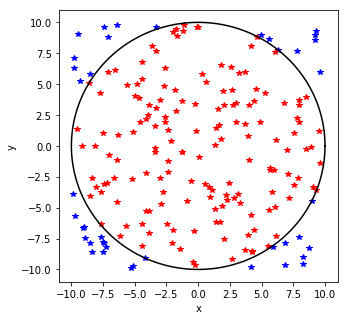

In [3]:
#Genreate a random dataset in a circle
def randomPointCircle(num, r, mark):
    for i in range(0, num):
        a = random.uniform(-r, r)
        b = random.uniform(-r, r)
        if (a**2) + (b**2) < (r**2):
            plt.plot(a,b,marker = mark,color = "red")
        else:
            plt.plot(a,b,marker = mark,color = "blue")    
#plot the dataset
plt.figure(figsize=(5,5))
plt.xlabel('x')
plt.ylabel('y')
randomPointCircle(200, 10, '*')
theta = np.arange(0, 2*np.pi, 0.01)
x = 0 + 10 * np.cos(theta)
y = 0 + 10 * np.sin(theta)
plt.plot(x, y,"black")
plt.show()

It is very hard for us to classified this dataset using only linear classification. (Of course we could use infinite lines to approach a circle, but that will be really expensive.) **So here come the solution: Non-linear Activation Fuction**

Just like the activation duction sgn() function we used in the upper examples, non-linear activation fuction is used to take the result we get from a neuron as imput, and map into the output value, like this:
$$g(X) = w_{0} + \sum_{1}^{n}{w_{i}x_{i}}$$
$$f(x) = a(g(X)) = a(w_{0} + \sum_{1}^{n}{w_{i}x_{i}})$$
Where $a( )$ is the activation fuction.

Here we'll introduce three most-commonly used non-linear activation fuction: **Sigmoid( ), Tahn( ) and Relu( )**. 

The choice of activation fuction is a very tricky problem. Sometimes different activation fuction will lead to very different training result. Because our target reader is the beginners, we won't talk much about their pros and cons. You can find more reading material about activation fuction in the [Further Resources](#Further-Resources) part.

### Sigmoid( )

Sigmoid function could also be written as $\sigma(.)$. The math expression is as follow:
$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

It could map continuous input value into (0,1)

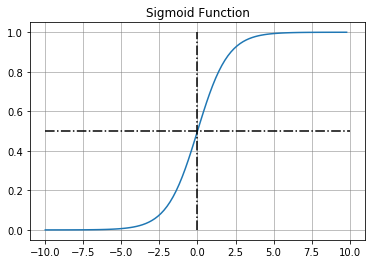

In [4]:
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

x = np.arange(-10., 10., 0.2)
y = sigmoid(x)
plt.plot(x,y)
plt.grid(True, linestyle = "-", color = "grey", linewidth = "0.5")
plt.plot([-10,10],[0.5,0.5],linestyle = "-.",color = "black")
plt.plot([0,0],[0,1],linestyle = "-.",color = "black")
plt.title("Sigmoid Function")
plt.show()

### Tanh(  )

Tanh( ) function is a transformation of Sigmoid() function:
$$Tanh(x) = 2Sigmoid(2x) - 1$$
It could also be expressed as:
$$Tanh(x) = \frac{\exp(x) - \exp(-x)}{\exp(x) + \exp(-x)}$$

Tahn( ) maps continuous input value into (-1,1). It has an expectation of 0, which Sigmoid( ) does not. This gives it better result in some cases.

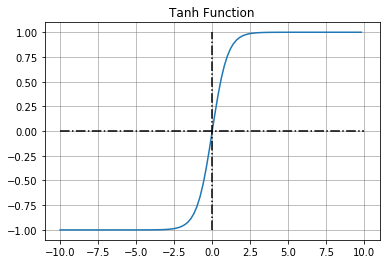

In [5]:
import math

def tanh(x):
    a = []
    for item in x:
        a.append((math.exp(item) - (math.exp(-item)))/(math.exp(item) + (math.exp(-item))))
    return a

x = np.arange(-10., 10., 0.2)
y = tanh(x)
plt.plot(x,y)
plt.grid(True, linestyle = "-", color = "grey", linewidth = "0.5")
plt.plot([-10,10],[0,0],linestyle = "-.",color = "black")
plt.plot([0,0],[-1,1],linestyle = "-.",color = "black")
plt.title("Tanh Function")
plt.show()

### ReLU( )

ReLu( ) is very popular these years because it is simple and fast:
$$f(x) = \max(0,x)$$
It is very suitable for training sparse data.

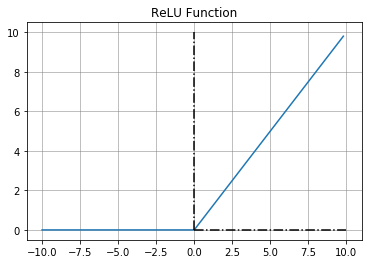

In [6]:
import math

def relu(x):
    a = []
    for item in x:
        a.append(item - min(0,item))
    return a

x = np.arange(-10., 10., 0.2)
y = relu(x)
plt.plot(x,y)
plt.grid(True, linestyle = "-", color = "grey", linewidth = "0.5")
plt.plot([0,10],[0,0],linestyle = "-.",color = "black")
plt.plot([0,0],[0,10],linestyle = "-.",color = "black")
plt.title("ReLU Function")
plt.show()

## Training

After talking about the topological structure and activation fuction of neural network, we could finally come to the point of training a neural network. Again, because this is only a tutorial for beginner, we will only discuss about some basic idea of training neural network. You could find more reading material in the [Further Resources](#Further-Resources) part. 

### Training goal
The training process is always an optimization problem. The goal of training is to minimize some **Loss Fuction**. For the three examples we have at the very beginning of this tutorial, the loss function could be:

- The number of animals you mis-classified.
- The rate for a "HIV seronegativity" sample be classified as “HIV seropositivity”
- The rate for a normal email be classified as spam.

If we use $L( )$ to denote the loss fuction, $Y$ to denote the expected output, and $f(X)$ to denote the output of the network, there are some popular loss function includes: 

#### 0-1 Loss

$$L(Y,f(x)) = \begin{cases} 1, Y \neq f(X) \\ 0, Y = f(X) \end{cases}$$

#### Absolute Loss

$$L(Y,f(X) = |Y - f(X)|$$

#### Log Loss

$$L(Y,P(Y|X))= -\log P(Y|X)$$

#### Square Loss

$$L(Y,f(X)) = (Y - f(X))^2$$

#### Exp Loss

$$L(Y,f(X)) = \exp(-Yf(X))$$

#### Hinge Loss

$$L(f(X)) = \max(0, 1-tf(X)), t = \pm 1$$

### Training approach

There are many approach to train a neural network. One of the approaches we use most today is **Gradient Descent**: to compute the gradient($\nabla$) of the loss function with regard to model parameters(the wights), and then use the gradient to update the parameters. 

For example, if we use gradient descent to compute the gradient given $n$ examples and then update the weight $W$, with learning rate $\alpha$ (Learning rate is the size of each step when doing gradient decent), the formula is as follow:
$$ W_{i+1} = W_{i} - \alpha \nabla \sum_{i = 1}^{n} L(f(x_{i}),Y_{i})$$

So basically, the training of neural network consists of two steps:

#### Forward pass:
Compute the output value $f(X)$ given a input vector $X$ and the current network parameters $W$.

#### Backward pass:
Compute all the gradients $\nabla_{W}L$ with just one pass and update parameters $W$.

The way to do backward pass is a method called **Backpropagation**, carried out by **Rumelhart** and **McCelland** in 1986. You could find more reading material in the [Further Resources](#Further-Resources) part.

## Further Resources

Congratulation! You have now know about all the basic things about Neural Network! However, as you may notice, we neglect many important details and haven't talk about programming implementation yet. So if you want to know more about it, please refer to the following material.

### [Machine Learning, Tom Mitchell, McGraw Hill, 1997.](http://www.cs.cmu.edu/afs/cs.cmu.edu/user/mitchell/ftp/mlbook.html)

A very good textbook that could be download for free. Chapter 4 talks about *Artificial Neural Network*

### [Machine Learning, Andrew Ng on coursera](https://www.coursera.org/learn/machine-learning)
One of the most popular courses on coursera. Videos are short so you could learn in your spare time.

###  [Tensorflow playground](http://playground.tensorflow.org) 

This is the fastest way to explore neural network. You could simply add neurons by clicking a button, and change the parameters as you want. Just have fun!

### [Tensorflow Library](https://www.tensorflow.org/)
Tensorflow is a library that could greatly help us to train a neural network. Here I use Tensorflow to build a neural network with one hidden layer. You could look deep into the library if you are interested.

In [7]:
import tensorflow as tf;

def train_data():
    x = [[2], [4], [7], [12], [14], [17], [20], [22], [28], [30], [50]];

    y = [[1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0]];
    return (x, y);

def test_data():
    x = [[3], [6], [8], [19], [21],[32],[44]];
    y = [[1, 0], [1, 0], [1, 0], [0, 1], [0,1], [1,0],[1,0]];
    return (x, y);

#Training dataset
x = tf.placeholder(dtype=tf.float32, shape=[None, 1], name='x-input');
#Label the training dataset
y_ = tf.placeholder(dtype=tf.float32, shape=[None, 2], name='y-input');
#Define the weights between input and the hidden layer
w1 = tf.get_variable('weight1', shape=[1, 3],
        initializer=tf.random_normal_initializer(stddev=1, dtype=tf.float32))
#Define the bias between input and the hiddden layer
b1 = tf.get_variable('bias1', shape=[3],
        initializer=tf.random_normal_initializer(stddev=1, dtype=tf.float32))
#Define the weight between the hidden layer and the output layer
w2 = tf.get_variable('weight2', shape=[3, 2],
        initializer=tf.random_normal_initializer(stddev=1, dtype=tf.float32))
#Define the weight between the hidden layer and the output layer
b2 = tf.get_variable('bias2', shape=[2],
        initializer=tf.random_normal_initializer(stddev=1, dtype=tf.float32))

layer1 = tf.nn.sigmoid(tf.matmul(x, w1) + b1);
#This is the estimated output value
y = tf.matmul(layer1, w2) + b2; 
#Use Squared-Loss as the loss function
loss = tf.nn.l2_loss(y-y_); 
#Start training 
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss);

#Testing
with tf.Session() as sess:
    #Initialization
    sess.run(tf.global_variables_initializer());
    x_train = train_data()[0];
    y_train = train_data()[1];
    for i in range(5000):
        sess.run(train, feed_dict={x:x_train, y_:y_train})

    #Test the accuracy of the training
    x_test = test_data()[0];
    y_test = test_data()[1];

    count = 0;
    y_max_value_index = np.argmax(y_test, axis=1); 
    for i in range(5):
        y_value = sess.run(y[i], feed_dict={x:x_test});

        if np.equal(y_max_value_index[i], np.argmax(y_value)):
            count += 1;
    print("the accuracy is: %f"%(count/len(y_test)));

the accuracy is: 0.714286
